Attempting to find correlation between certain features?

In [2]:
# !pip install autograd
import pandas as pd
import autograd.numpy as np
from autograd import grad 

In [10]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
train_df = pd.read_csv(datasets["train"])
test_df = pd.read_csv(datasets["test"])
attribute_names = list(train_df)[:-1]

print("Original attributes: ", attribute_names, "\n")

features_to_remove = ['key', 'mode', 'duration_ms', 'time_signature']
print("Features to remove: ", features_to_remove, "\n")

train_df = train_df.drop(features_to_remove, axis = 1)

attribute_names = list(train_df)[:-1]
print("Pruned attributes: ", attribute_names, "\n")

Original attributes:  ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'] 

Features to remove:  ['key', 'mode', 'duration_ms', 'time_signature'] 

Pruned attributes:  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'] 



In [11]:
# Split test and training into x and y values
x_train = train_df[attribute_names]
x_test = test_df[attribute_names]

original_x = x_train.values

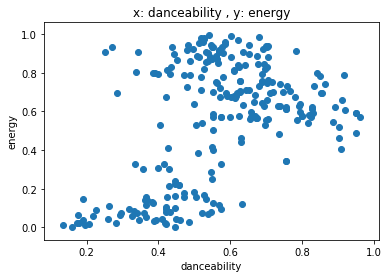

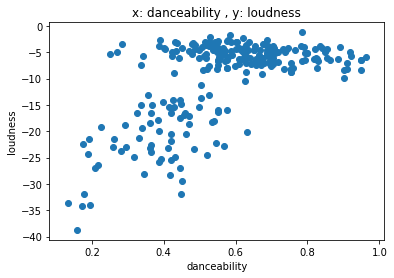

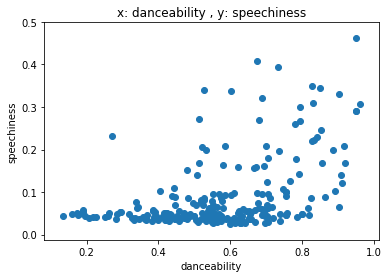

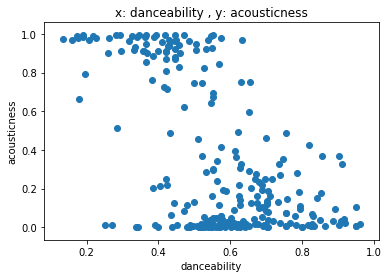

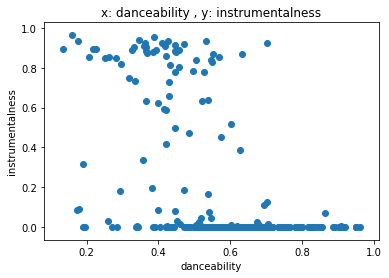

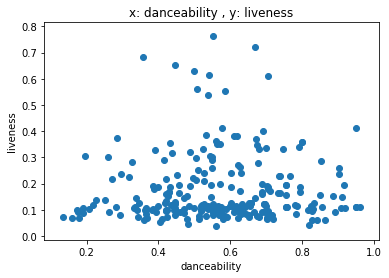

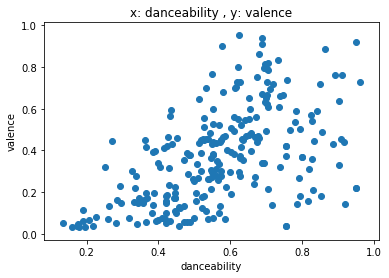

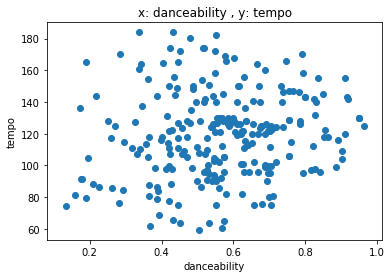

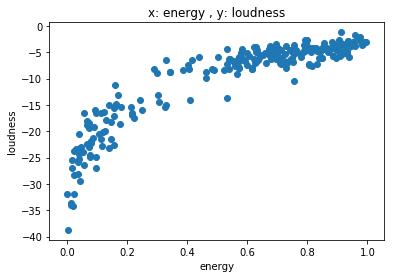

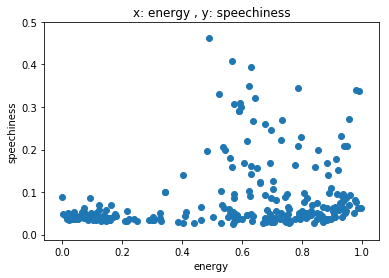

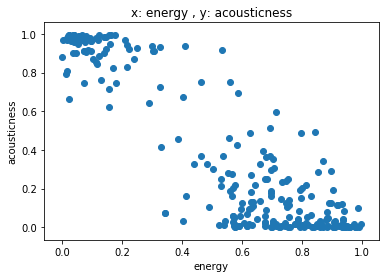

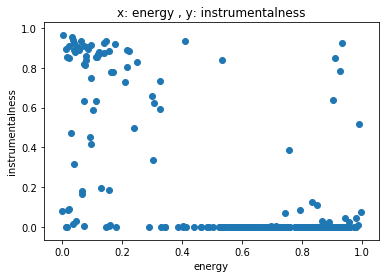

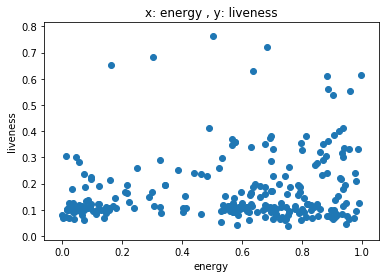

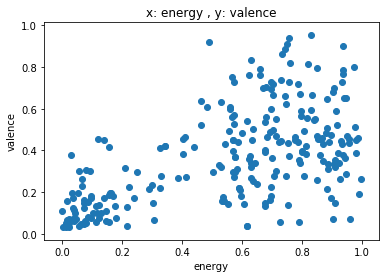

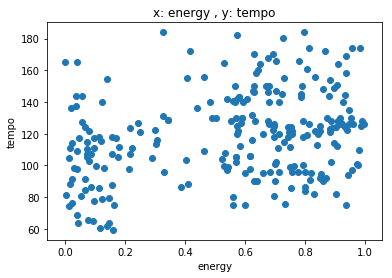

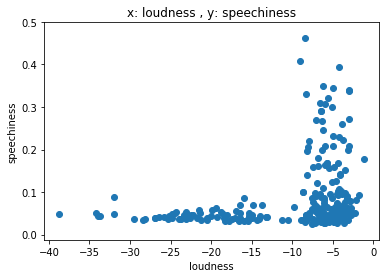

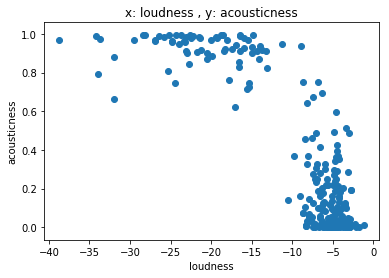

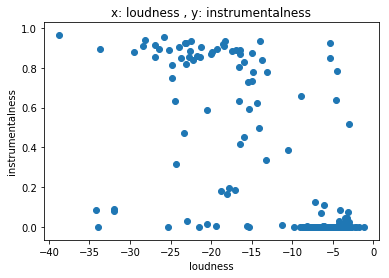

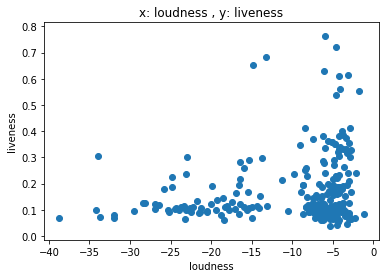

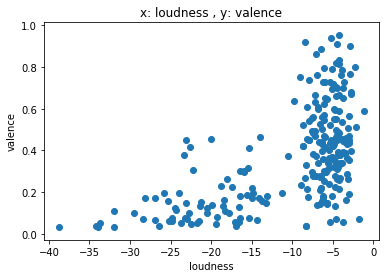

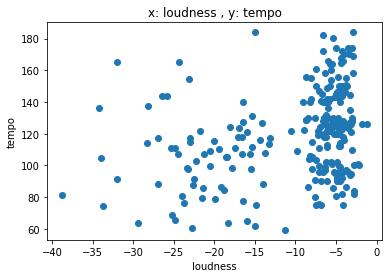

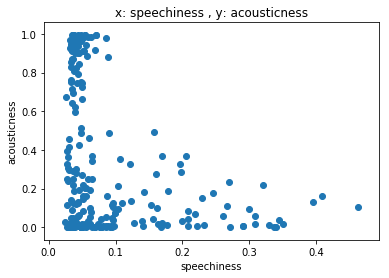

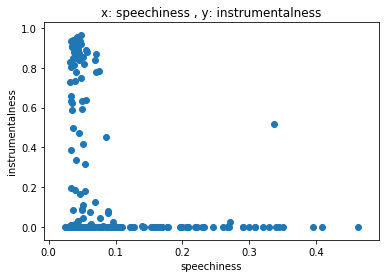

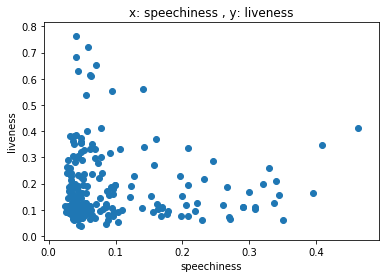

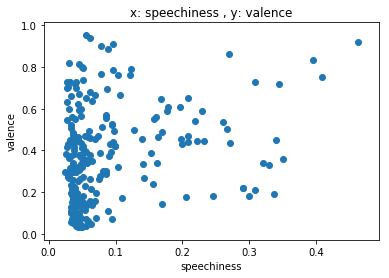

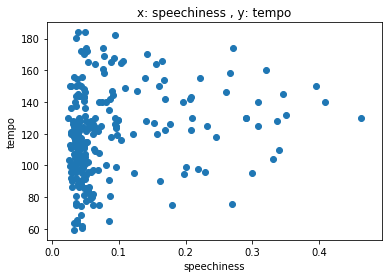

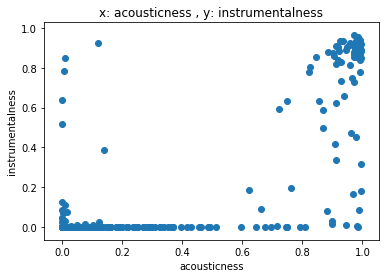

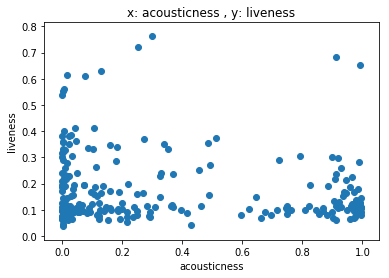

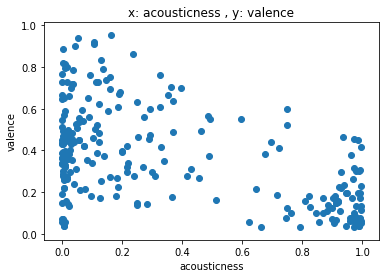

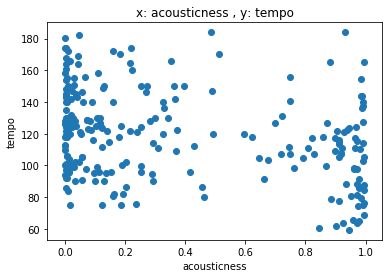

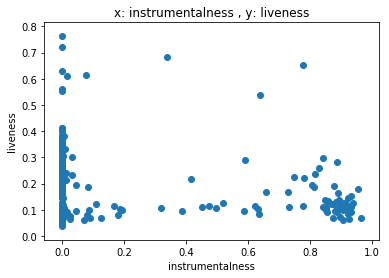

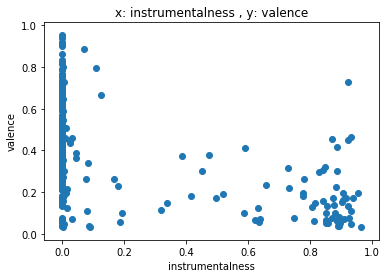

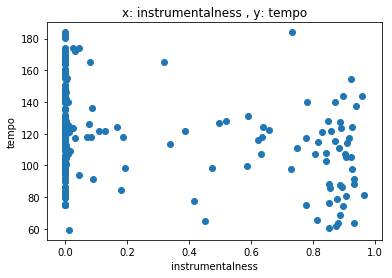

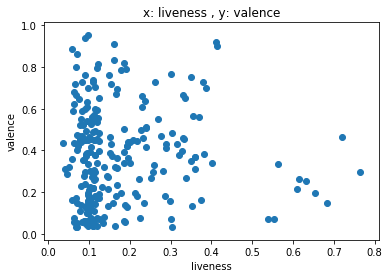

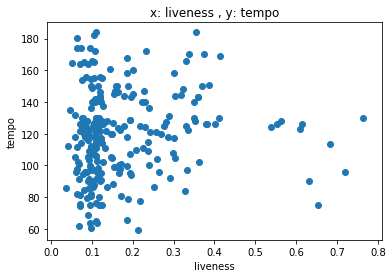

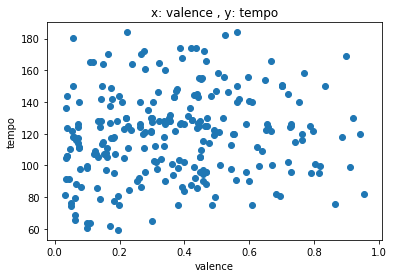

In [12]:
import matplotlib.pyplot as plt
def draw_feature_comparison():    
    for feature_index in range(len(attribute_names)):
        for feature_index2 in range(feature_index, len(attribute_names)):
            if feature_index == feature_index2:
                continue
                # don't need to compare with itself
            plt.scatter(original_x[:, feature_index], original_x[:, feature_index2])
            plt.xlabel(attribute_names[feature_index])
            plt.ylabel(attribute_names[feature_index2])
            
            title = "x: " + attribute_names[feature_index] + " , y: " + attribute_names[feature_index2]
            plt.title(title)
            plt.show()
draw_feature_comparison()

Our observations:
- danceibility and energy: positive correlation
- danceability & valence, kind of spaced out distribution
- loudness & energy: real nice log graph 
- loudness & acoustiness: log graph
- liveness & loudness
- eh danceability and valence?

not that useful feature comparisons
- time signature
- duration_ms
- key
- mode

## Loudness vs Energy

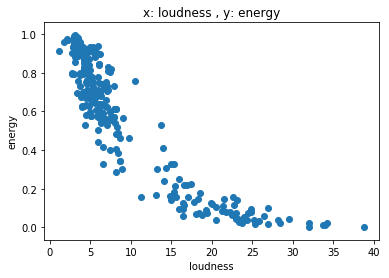

In [239]:
attribute1 = "loudness"
attribute2 = "energy"

index1 = attribute_names.index(attribute1)
index2 = attribute_names.index(attribute2)
# let's go ahead and make loudness positive so we can take the log later
data1 = -original_x[:, index1]
data2 = original_x[:, index2]

plt.xlabel(attribute1)
plt.ylabel(attribute2)
title = "x: " + attribute1 + " , y: " + attribute2
plt.title(title)

plt.scatter(data1, data2)
plt.show()

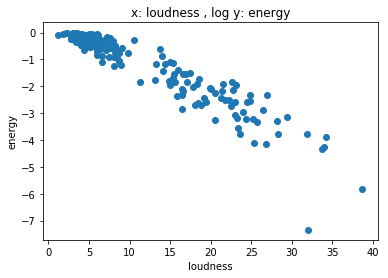

In [240]:
log_data1 = np.log(data1)
log_data2 = np.log(data2) 

log_data1 = np.reshape(log_data1, (-1, 1))
log_data2 = np.reshape(log_data2, (-1, 1))

plt.xlabel(attribute1)
plt.ylabel(attribute2)
title = "x: " + attribute1 + " , log y: " + attribute2
plt.title(title)

plt.scatter(data1, log_data2)
plt.show()

In [153]:
def normalizer(x):
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_stds = np.std(x,axis = 1)[:,np.newaxis]  
    return (x - x_means)/x_stds

# a + b*log(c* x)
def model(x, w):
    return w[0] + w[1]*np.log(np.dot(x.T, w[2]))

# a + b*log(x)
def model2(x, w):
    return w[0] + w[1]*np.log(x.T)

def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

In [257]:
x = np.array([data1])
y = np.array([data2])

# w = np.abs(np.random.randn(3, 1))
# w should start off positive
w = np.ones((3, 1))
max_its = 450
alpha = 10**(-2)

weights, costs = gradient_descent(least_squares,alpha,max_its,w)

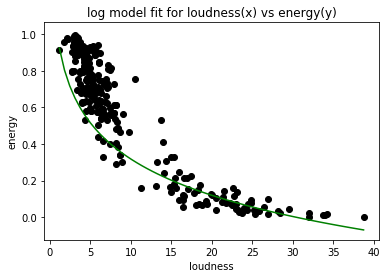

[[ 0.97771908]
 [-0.28628581]
 [ 0.63904467]]
log model: 0.9777190790146003 + -0.2862858115483869*np.log(x))


In [258]:
tuned_weight = weights[max_its]

plt.scatter(data1, data2, color = "black")

line_x = np.linspace(np.amin(data1), np.amax(data1), 60)
line_y = [model2(np.array([x_val]), tuned_weight) for x_val in line_x]

plt.plot(line_x, line_y, color = "g")
plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.title("log model fit for loudness(x) vs energy(y)")
plt.show()
print(tuned_weight)
print("log model: {0} + {1}*np.log(x))".format(tuned_weight[0, 0], tuned_weight[1, 0], tuned_weight[2, 0]))

To do:
- insert model + prediction
- just use sklearn instead to find models - would be faster

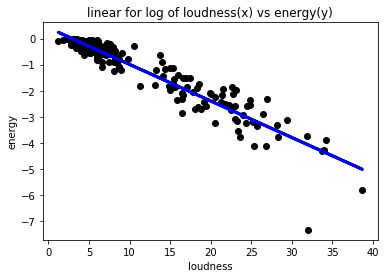

linear model: -0.14042385171479035*x + 0.4143374788332038


In [190]:
import matplotlib.pyplot as plt
from sklearn import linear_model
lm = linear_model.LinearRegression()

#logx = [np.log(value) for value in data1]
logy = [np.log(value) for value in data2]

#logx = np.reshape(logx, (-1, 1))
data1 = np.reshape(data1, (-1, 1))
logy = np.reshape(logy, (-1, 1))

lm.fit(data1, logy)
logy_predictions = lm.predict(data1)
plt.scatter(data1, logy,  color='black')
plt.plot(data1, logy_predictions, color='blue', linewidth=3)
plt.title("linear for log of loudness(x) vs energy(y)")

plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.show()


intercept = lm.intercept_[0]
slope = lm.coef_[0][0]

print("linear model: {0}*x + {1}".format(slope,intercept))

## Acousticness vs Loudness

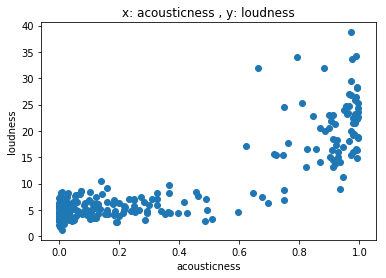

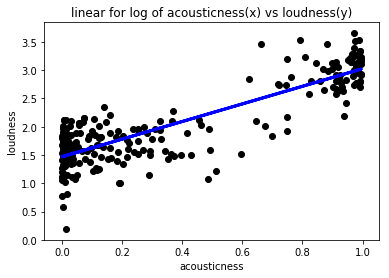

linear model: 1.5560649792647154*x + 1.4697268363018088


In [266]:
# to do: acousticness vs loudness:
attribute1 = "acousticness"
attribute2 = "loudness"

index1 = attribute_names.index(attribute1)
index2 = attribute_names.index(attribute2)
# let's go ahead and make loudness positive so we can take the log later
data1 = original_x[:, index1]
data2 = -original_x[:, index2]

plt.xlabel(attribute1)
plt.ylabel(attribute2)
title = "x: " + attribute1 + " , y: " + attribute2
plt.title(title)

plt.scatter(data1, data2)
plt.show()

#logx = [np.log(value) for value in data1]
logy = np.log(data2)

#logx = np.reshape(logx, (-1, 1))
data1 = np.reshape(data1, (-1, 1))
logy = np.reshape(logy, (-1, 1))

lm.fit(data1, logy)
logy_predictions = lm.predict(data1)
plt.scatter(data1, logy,  color='black')
plt.plot(data1, logy_predictions, color='blue', linewidth=3)
plt.title("linear for log of acousticness(x) vs loudness(y)")

plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.show()


intercept = lm.intercept_[0]
slope = lm.coef_[0][0]

print("linear model: {0}*x + {1}".format(slope,intercept))